# Movie Success Predictor  
## Phase 6: Hit / Flop Classification (Logistic Regression)

### Objective

The objective of this phase is to train and evaluate a Logistic Regression
model to predict whether a movie will be a **Hit (1)** or **Flop (0)**.

The model uses a preprocessing pipeline defined in Phase 5, ensuring that
all transformations are learned exclusively from training data to prevent
data leakage and maintain deployment readiness.

### Step 1: Load Modeling Artifacts

Previously saved train–test splits and the preprocessing pipeline are
loaded. This ensures consistent data usage and reproducibility across
modeling experiments.


In [1]:
import joblib
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Load train-test splits
X_train = joblib.load("../data/processed/X_train.joblib")
X_test = joblib.load("../data/processed/X_test.joblib")

y_train = joblib.load("../data/processed/y_class_train.joblib")
y_test = joblib.load("../data/processed/y_class_test.joblib")

# Load preprocessing pipeline (unfitted)
preprocessor = joblib.load("../models/preprocessor.joblib")

print("Artifacts loaded successfully.")

Artifacts loaded successfully.


### Step 2: Logistic Regression Pipeline Definition

A modeling pipeline is created by combining the preprocessing steps with
a Logistic Regression classifier. This ensures that preprocessing and
model training occur as a single, unified operation.


In [2]:
# Logistic Regression pipeline
logistic_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("classifier",LogisticRegression(max_iter=1000,solver="lbfgs"))
])

print("Logistic Regression pipeline defined.")


Logistic Regression pipeline defined.


### Step 3: Model Training

The Logistic Regression model is trained using the training dataset.
All preprocessing steps are learned exclusively from training data
through the pipeline.


In [3]:
# Train the Logistic Regression model
logistic_pipeline.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

"""

What just happened internally (important)

preprocessor.fit_transform(X_train)

classifier.fit(transformed_X_train, y_train)

"""


Logistic Regression model trained successfully.


'\n\nWhat just happened internally (important)\n\npreprocessor.fit_transform(X_train)\n\nclassifier.fit(transformed_X_train, y_train)\n\n'

### Step 4: Model Evaluation

The trained Logistic Regression model is evaluated on the test dataset.
Performance metrics including accuracy, precision, recall, and F1-score
are used to assess classification effectiveness.


In [4]:
# Predictions
y_pred = logistic_pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       284
           1       0.77      0.79      0.78       362

    accuracy                           0.75       646
   macro avg       0.74      0.74      0.74       646
weighted avg       0.75      0.75      0.75       646



In [5]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual Flop', 'Actual Hit'],
    columns=['Predicted Flop', 'Predicted Hit']
)

cm_df

,Predicted Flop,Predicted Hit
Actual Flop,197,87
Actual Hit,77,285


In [6]:
# Save trained Logistic Regression pipeline
joblib.dump(logistic_pipeline, "../models/logistic_model.joblib")

print("Logistic Regression model saved successfully.")

Logistic Regression model saved successfully.


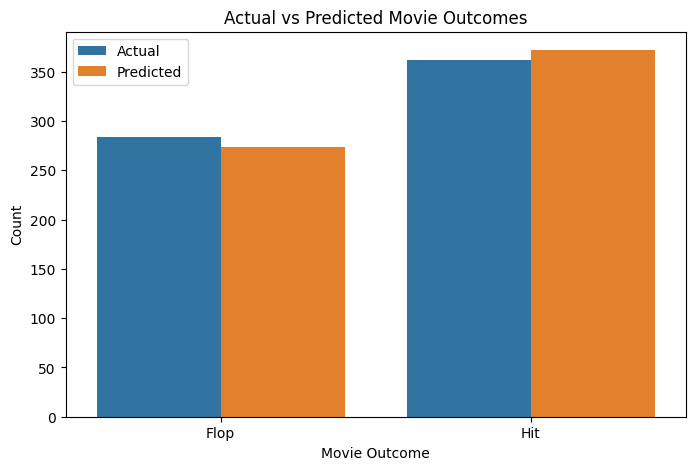

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

plt.figure(figsize=(8, 5))
sns.countplot(
    data=comparison_df.melt(var_name='Type', value_name='Class'),
    x='Class',
    hue='Type'
)

plt.xticks([0, 1], ['Flop', 'Hit'])
plt.title('Actual vs Predicted Movie Outcomes')
plt.xlabel('Movie Outcome')
plt.ylabel('Count')
plt.legend(title='')
plt.show()


The bar plot compares actual and predicted movie outcomes.
The close alignment between actual and predicted distributions indicates
that the model does not suffer from strong class bias and produces
balanced predictions across hit and flop categories.

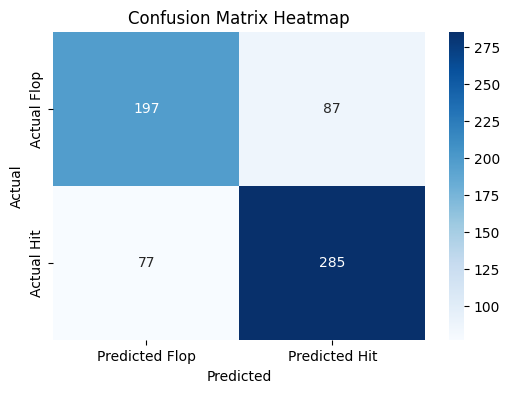

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted Flop', 'Predicted Hit'],
    yticklabels=['Actual Flop', 'Actual Hit']
)

plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


The confusion matrix heatmap highlights the distribution of correct and
incorrect predictions. The model shows stronger performance in identifying
hit movies while maintaining reasonable accuracy for flop predictions.

### Model Performance Summary

The Logistic Regression model achieved an accuracy of **74.6%**, indicating
that it correctly predicts approximately three out of four movies as either
a hit or a flop.

The model demonstrates balanced performance across both classes, with a
slightly stronger ability to identify successful movies. Precision and
recall values suggest that the model effectively captures hit movies while
maintaining reasonable control over false positives.

The confusion matrix shows that the model prioritizes minimizing missed hit
movies, which aligns well with real-world decision-making scenarios where
identifying potential successes is often more valuable than avoiding all
false positives.

Overall, the model provides a reliable and interpretable baseline for movie
success prediction.


## Phase 6 Summary

A Logistic Regression model was successfully trained and evaluated to
predict movie hit or flop outcomes. The model was implemented using a
pipeline-based approach to ensure consistency, prevent data leakage, and
support deployment.

The trained model was saved for reuse in downstream applications and
deployment.
